In [8]:
import os

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np

In [2]:
filedict={'g345' : 'dl_G345/datas/modulus_and_damping_ratio.csv',
'g375' : 'dl_G375/datas/modulus_and_damping_ratio.csv',
'g375_1' : 'dl_G375_1/datas/modulus_and_damping_ratio.csv'}
for k, d in enumerate(filedict):
    print(k,d,filedict[d])

0 g345 dl_G345/datas/modulus_and_damping_ratio.csv
1 g375_1 dl_G375_1/datas/modulus_and_damping_ratio.csv
2 g375 dl_G375/datas/modulus_and_damping_ratio.csv


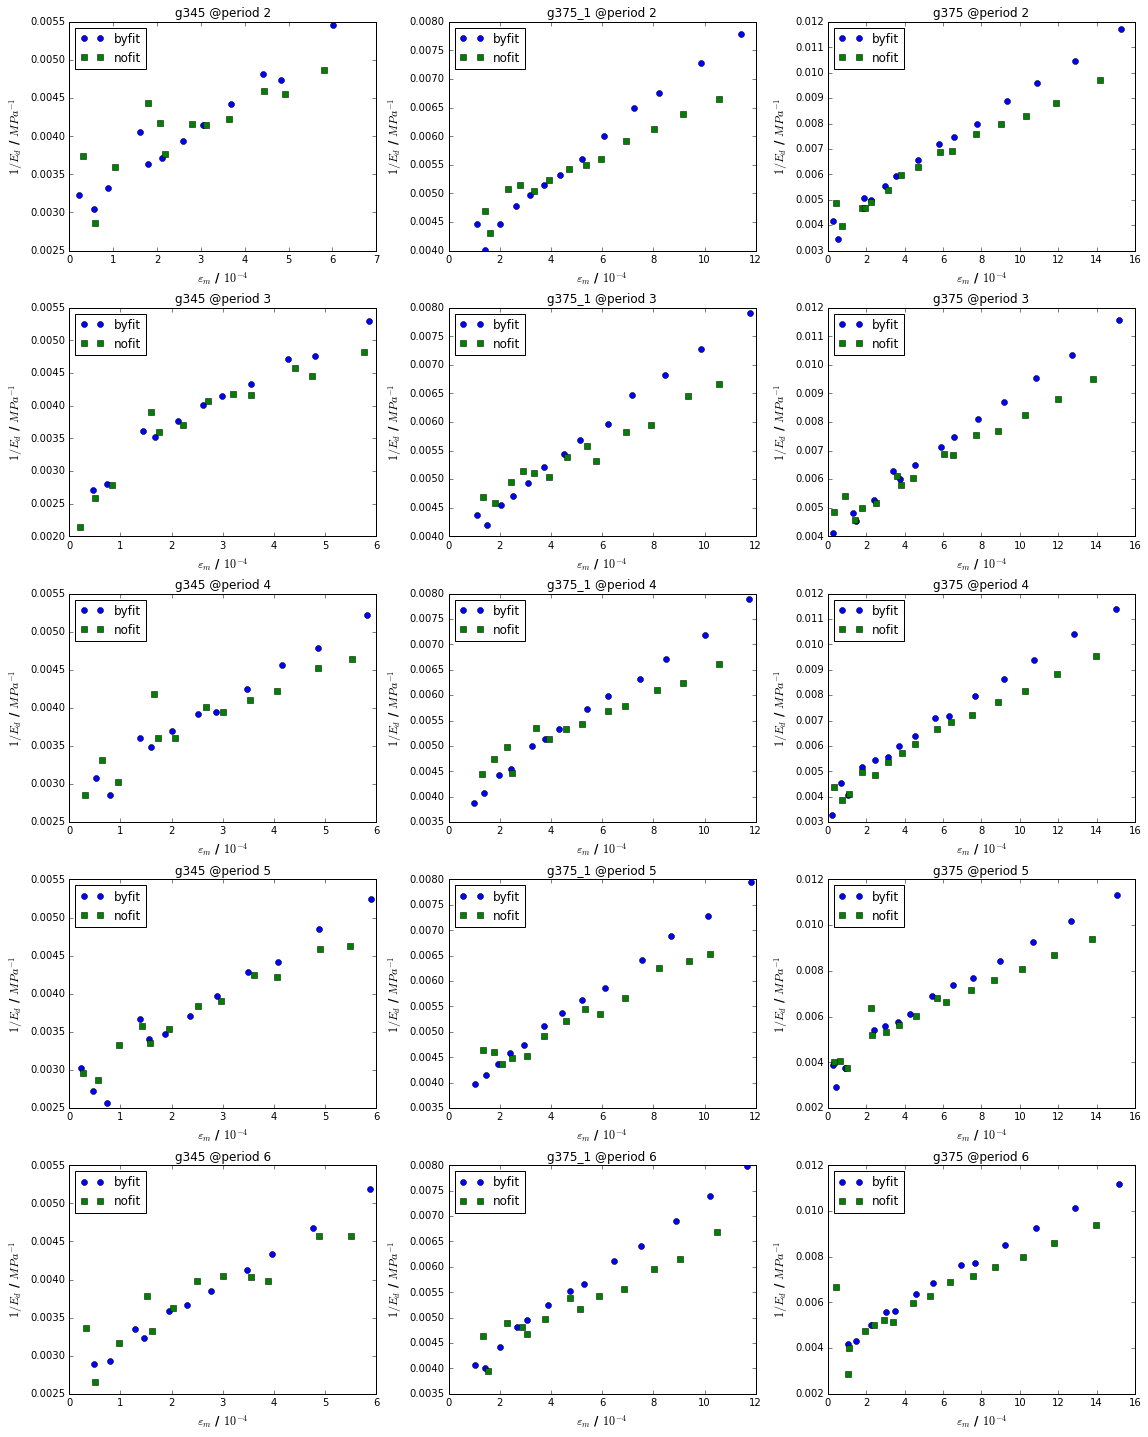

In [4]:
plt.figure(figsize=(16,20),dpi=300)
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
       
        plt.subplot(5,3,3*p+i+1)
        plt.plot(data['epsilon_m_byfit'][1:]*1e4, 1000/data['modulus_byfit'][1:],'o',label='byfit')
        plt.plot(data['epsilon_m'][1:]*1e4, 1000/data['modulus'][1:],'s',label='nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearEd.svg')

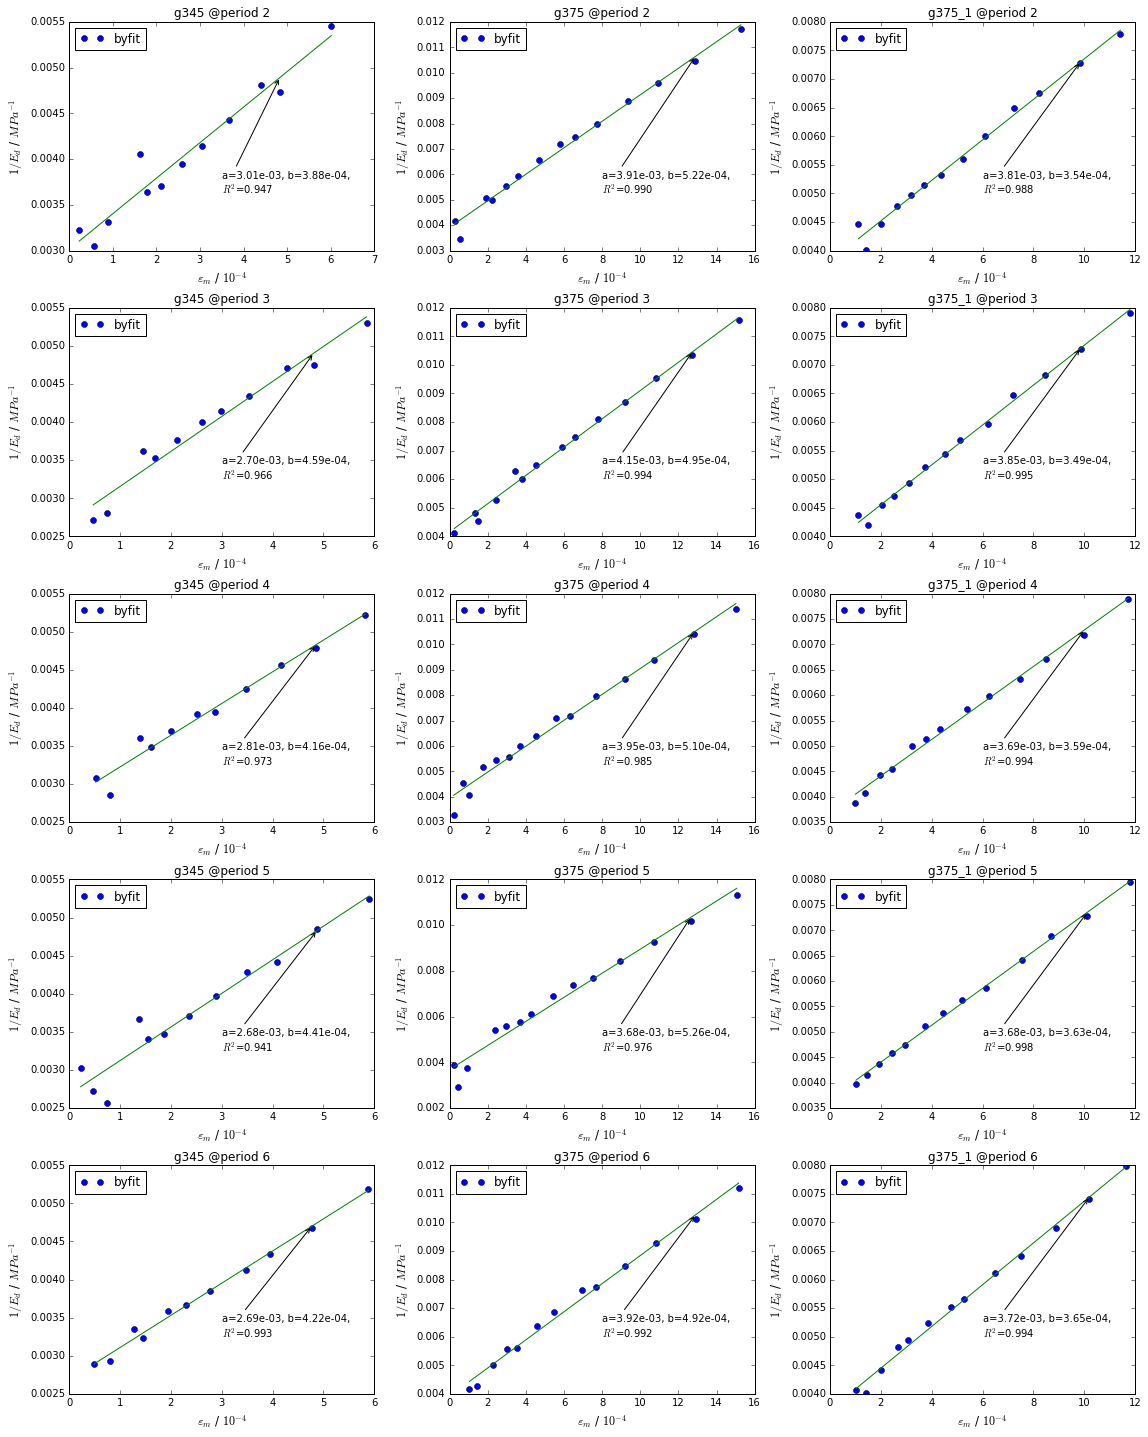

In [41]:
plt.figure(figsize=(16,20),dpi=300)
linetext = 'a={0:.2e}, b={1:.2e},\n$R^2$={2:.3f}'
style = dict(arrowstyle='->', connectionstyle='arc3', relpos=(0., 0.))
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(5,3,3*p+i+1)
        x = data['epsilon_m_byfit'][1:].values*1e4
        y = 1e3/data['modulus_byfit'][1:].values
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'o',label='byfit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.25), textcoords='axes fraction', arrowprops=style)
        
#         x = data['epsilon_m'][1:].values*1e4
#         y = 1000/data['modulus'][1:].values
#         b, a, r, p, std_err = stats.linregress(x, y)
#         y_lr = b*x+a
#         plt.plot(x, y,'s',label='nofit')
#         plt.plot(x, y_lr)
#         plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
        
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearregressEd_byfit.svg')

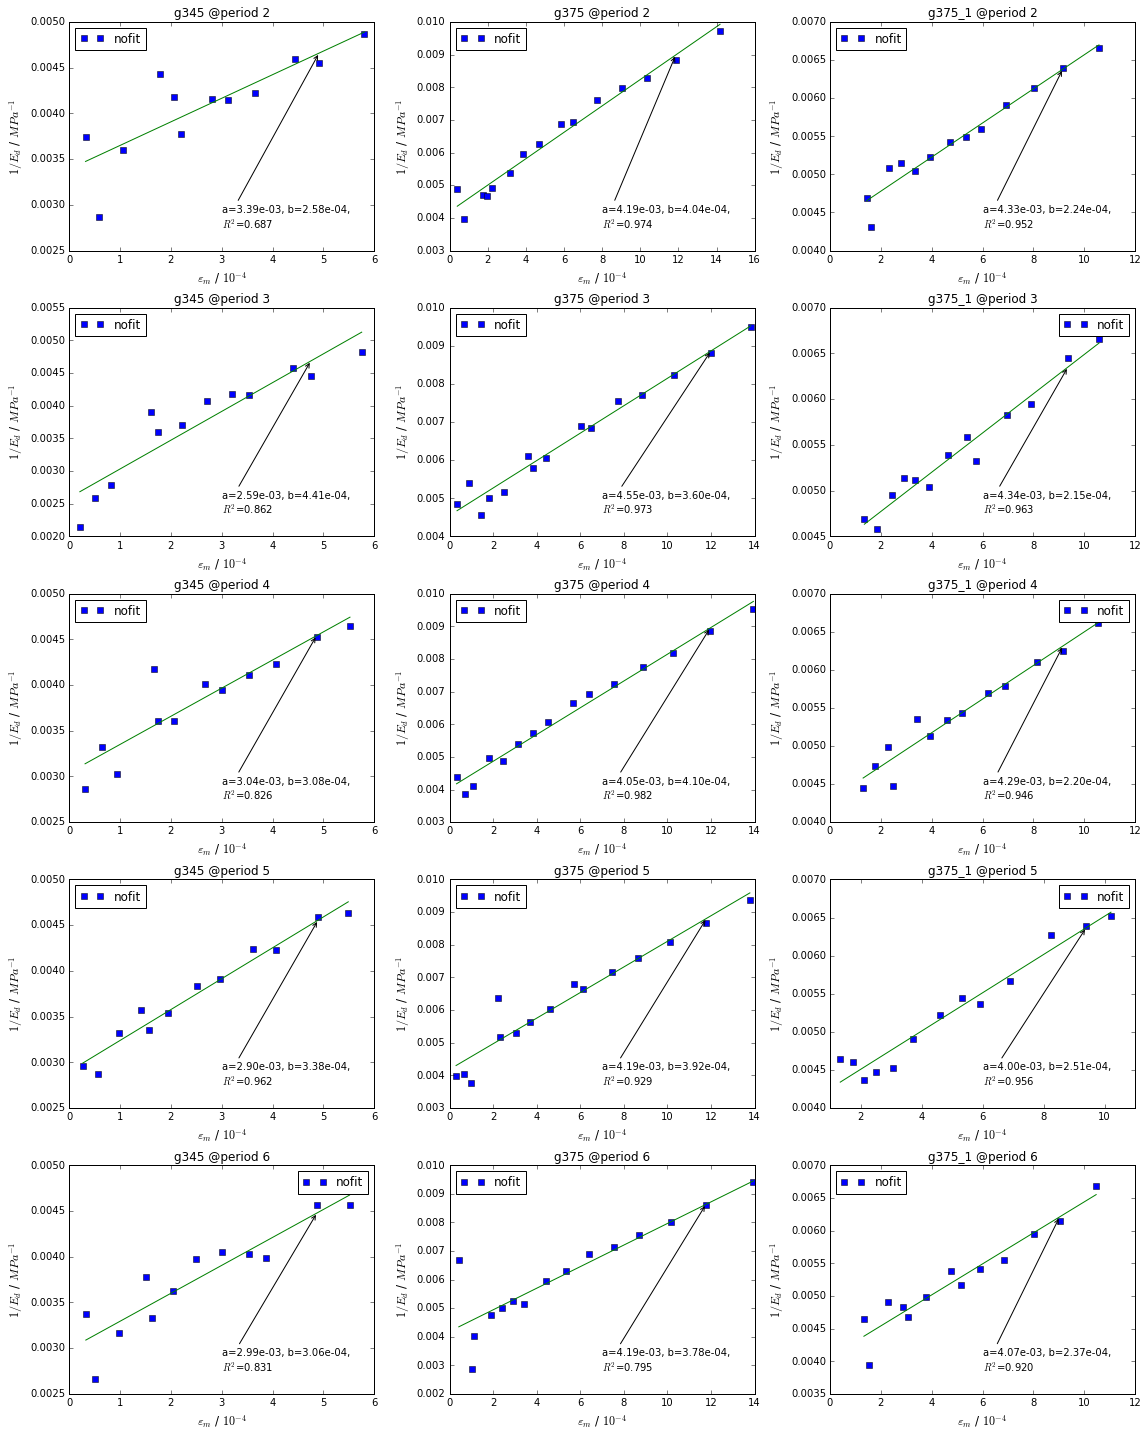

In [40]:
plt.figure(figsize=(16,20),dpi=300)
linetext = 'a={0:.2e}, b={1:.2e},\n$R^2$={2:.3f}'
style = dict(arrowstyle='->', connectionstyle='arc3', relpos=(0., 0.))
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(5,3,3*p+i+1)
#         x = data['epsilon_m_byfit'][1:].values*1e4
#         y = 1e6/data['modulus_byfit'][1:].values
#         x = x[~np.isnan(x)]
#         y = y[~np.isnan(y)]
#         b, a, r, p, std_err = stats.linregress(x, y)
#         y_lr = b*x+a
#         plt.plot(x, y,'o',label='byfit')
#         plt.plot(x, y_lr)
#         plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.25), textcoords='axes fraction', arrowprops=style)
        
        x = data['epsilon_m'][1:].values*1e4
        y = 1000/data['modulus'][1:].values
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'s',label='nofit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
        
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearregressEd_nofit.svg')

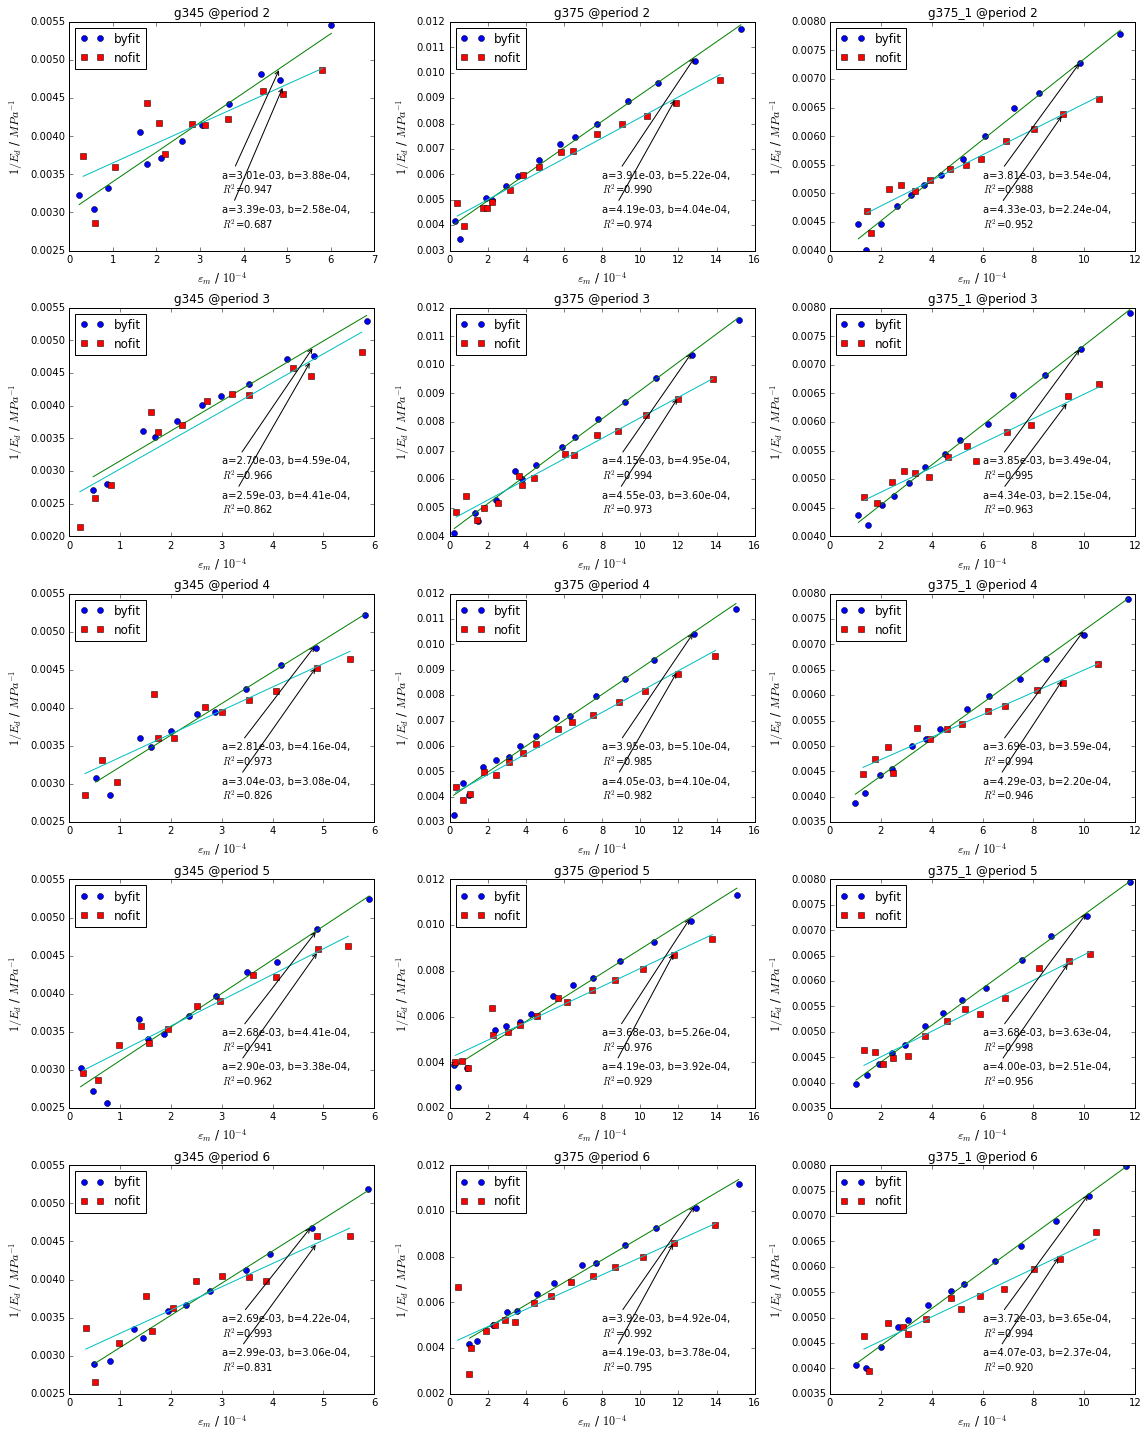

In [42]:
plt.figure(figsize=(16,20),dpi=300)
linetext = 'a={0:.2e}, b={1:.2e},\n$R^2$={2:.3f}'
style = dict(arrowstyle='->', connectionstyle='arc3', relpos=(0., 0.))
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(5,3,3*p+i+1)
        x = data['epsilon_m_byfit'][1:].values*1e4
        y = 1e3/data['modulus_byfit'][1:].values
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'o',label='byfit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.25), textcoords='axes fraction', arrowprops=style)
        
        x = data['epsilon_m'][1:].values*1e4
        y = 1000/data['modulus'][1:].values
        b, a, r, p, std_err = stats.linregress(x, y)
        y_lr = b*x+a
        plt.plot(x, y,'s',label='nofit')
        plt.plot(x, y_lr)
        plt.annotate(linetext.format(a,b,r*r), xy=(x[-2],y_lr[-2]), xytext=(0.5,0.1), textcoords='axes fraction', arrowprops=style)
        
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/linearregressEd.svg')

In [9]:
prds = ['period {0}'.format(i) for i in '23456']
for k in filedict:
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    as_byfit = []
    bs_byfit = []
    rs_byfit = []
    as_nofit = []
    bs_nofit = []
    rs_nofit = []
    
    for col in'23456':
        data = df[col]
        
        x = data['epsilon_m_byfit'][1:].values*1e4
        y = 1e3/data['modulus_byfit'][1:].values
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        b, a, r, p, std_err = stats.linregress(x, y)
        as_byfit.append(a)
        bs_byfit.append(b)
        rs_byfit.append(r)
        
        x = data['epsilon_m'][1:].values*1e4
        y = 1000/data['modulus'][1:].values
        b, a, r, p, std_err = stats.linregress(x, y)
        as_nofit.append(a)
        bs_nofit.append(b)
        rs_nofit.append(r)
        
    tmp_dict = {('efit','a'):as_byfit, ('efit','b'):bs_byfit, ('efit','r'):rs_byfit,
                ('nofit','a'):as_nofit, ('nofit','b'):bs_nofit, ('nofit','r'):rs_nofit}
    tmp_df = pd.DataFrame(tmp_dict, index=prds)
    filedir = os.path.dirname(filedict[k])
    tmp_df.to_csv(os.path.join(filedir, 'ab.csv'))
    print(tmp_df)   

              efit                         nofit                    
                 a         b         r         a         b         r
period 2  0.003014  0.000388  0.973314  0.003391  0.000258  0.828898
period 3  0.002696  0.000459  0.982747  0.002591  0.000441  0.928246
period 4  0.002809  0.000416  0.986228  0.003043  0.000308  0.908668
period 5  0.002682  0.000441  0.970065  0.002901  0.000338  0.980781
period 6  0.002686  0.000422  0.996422  0.002988  0.000306  0.911653
              efit                         nofit                    
                 a         b         r         a         b         r
period 2  0.003810  0.000354  0.994172  0.004331  0.000224  0.975956
period 3  0.003855  0.000349  0.997736  0.004343  0.000215  0.981289
period 4  0.003692  0.000359  0.996862  0.004292  0.000220  0.972571
period 5  0.003677  0.000363  0.999038  0.004004  0.000251  0.977587
period 6  0.003719  0.000365  0.997196  0.004066  0.000237  0.959273
              efit                

In [6]:
prds = ['period {0}'.format(i) for i in '23456']
prds

['period 2', 'period 3', 'period 4', 'period 5', 'period 6']